# Problema: Resolver las ecuaciones de Hamilton para $H(q,p) = V(q)+K(p)$, es decir, resolver el siguiente sistema:

$$\begin{cases} \dot{q} = \frac{\partial H}{\partial p} =\frac{\partial K}{\partial p} \\ \dot{p} = - \frac{\partial H}{\partial q} = - \frac{\partial V}{\partial q} \\ (q(t_0), p(t_0)) = (q_0, p_0) \end{cases}$$

# Método de Euler no-simpléctico. 


\begin{cases}
q (t_{k+1}) = q(t_k) + \tau \frac{\partial K}{\partial p} \big( p (t_k) \big)   \\
p ( t_{k+1} ) = p(t_k) - \tau \frac{\partial V}{\partial q} \big( q (t_k) \big) 
\end{cases}

, tal que $t_k=k \tau$. 

In [1]:
#EULER NO-SIMPLÉCTICO

# q_0, p_0 <- Condiciones iniciales
# τ <- Tamaño de paso
# N <- Número de iteraciones
# ∂_K <- Derivada (gradiente) de la energía cinetica
# ∂_V <- Derivada (gradiente) de la energía potencial

@inline function euler_1(q_0::Float64, p_0::Float64, τ::Float64, N::Int64, ∂_K::Function, ∂_V::Function)
    q = zeros(N+1) #Lista de posiciones
    p = zeros(N+1) #Lista de momentos
    
    #Condiciónes iniciales
    q[1] = q_0 
    p[1] = p_0
    
    for i in 1:N
        # Actualizar posición
        q[i+1] = q[i] + τ * ∂_K(p[i])
        # Actualzar momento
        p[i+1] = p[i] - τ * ∂_V(q[i])
    end
    return q, p
end;

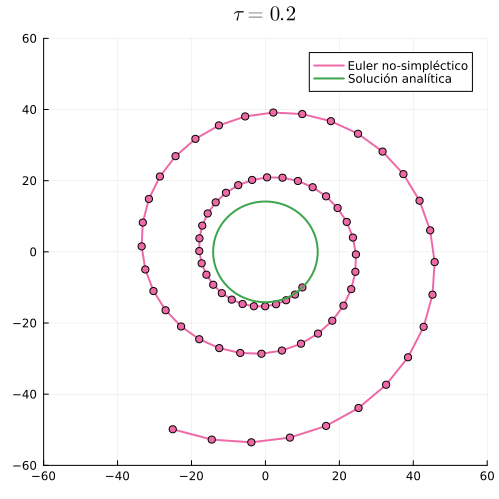

In [2]:
grad_K(p) = p
grad_V(q) = q

#Gráfica de la aproximación

p_0 = 10.0
q_0 = -10.0

τ = 0.2

N = 70

G = euler_1(p_0, q_0, τ, N, grad_K, grad_V)

using Plots

plot(G, xlims=(-60, 60), ylims=(-60,60), linewidth=2, color = "hotpink2", label = "Euler no-simpléctico")
    
scatter!(G, xlims=(-60, 60), ylims=(-60,60), label = "", color = "hotpink2")

#Gráfica análitica

T = range(0, 2*π, length=1000)

plot!( [sqrt(200)*cos(t) for t in T], [sqrt(200)*sin(t) for t in T], linewidth=2, label="Solución analítica")

title!("\$ \\tau = 0.2 \$")

plot!(size=(500,500))
    
#savefig("Euler_no_simpléctico.png")

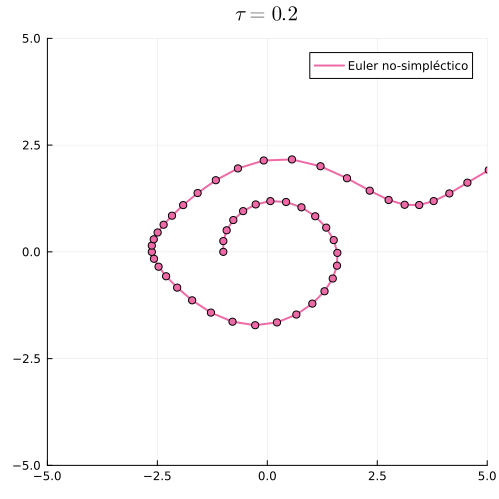

In [3]:
grad_K(p) = p
grad_V(q) = sin(q)

#Gráfica de la aproximación

p_0 = -1.0
q_0 = 0.0

τ = 0.3

N = 70

G = euler_1(p_0, q_0, τ, N, grad_K, grad_V)

using Plots

plot(G, xlims=(-5, 5), ylims=(-5, 5), linewidth=2, color = "hotpink2", label = "Euler no-simpléctico")
    
scatter!(G, xlims=(-5, 5), ylims=(-5, 5), label = "", color = "hotpink2")

#Gráfica análitica

#T = range(0, 2*π, length=1000)

#plot!( [sqrt(200)*cos(t) for t in T], [sqrt(200)*sin(t) for t in T], linewidth=2, label="Solución analítica")

title!("\$ \\tau = 0.2 \$")

plot!(size=(500,500))

# Método de Euler simpléctico. 

\begin{cases}
q (t_{k+1}) = q(t_k) + \tau \frac{\partial K}{\partial p} \big( p (t_k) \big)   \\
p ( t_{k+1} ) = p(t_k) - \tau \frac{\partial V}{\partial q} \big( q (t_{k+1}) \big) 
\end{cases}

In [4]:
@inline function euler_2(q_0::Float64, p_0::Float64, τ::Float64, N::Int64, ∂_K::Function, ∂_V::Function)
    
    q = zeros(N+1) #Lista de posiciones
    p = zeros(N+1) #Lista de momentos
    
    #Condiciones iniciales
    q[1] = q_0
    p[1] = p_0
    
    for i in 1:N
        # Actualizar posición
        q[i+1] = q[i] + τ * ∂_K(p[i])
        # Actualiza momento 
        p[i+1] = p[i] - τ * ∂_V(q[i+1])
    end
    return q, p
end;

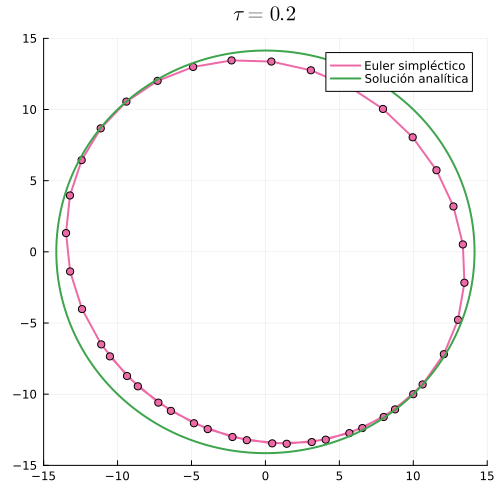

In [5]:
grad_K(p) = p
grad_V(q) = q

p_0 = 10.0
q_0 = -10.0

τ = 0.2

N = 40

G = euler_2(p_0, q_0, τ, N, grad_K, grad_V);

plot(G, xlims=(-15, 15), ylims=(-15,15), linewidth=2, color = "hotpink2", label = "Euler simpléctico")
    
scatter!(G, xlims=(-15, 15), ylims=(-15,15), label = "", color = "hotpink2")

#Gráfica análitica

T = range(0, 2*π, length=1000)

plot!( [sqrt(200)*cos(t) for t in T], [sqrt(200)*sin(t) for t in T], linewidth=2, label="Solución analítica")

title!("\$ \\tau = 0.2 \$")

plot!(size=(500,500))

#savefig("Euler_simpléctico.png")

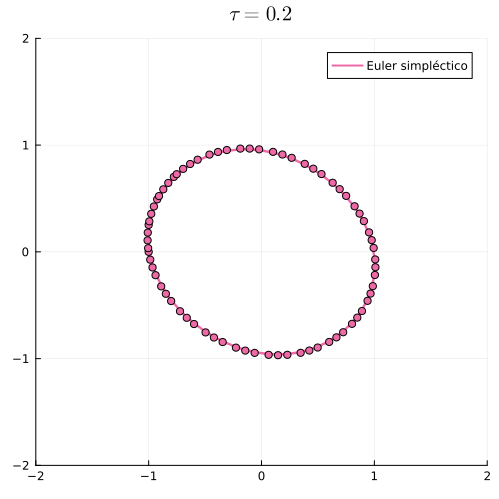

In [6]:
grad_K(p) = p
grad_V(q) = sin(q)

#Gráfica de la aproximación

p_0 = -1.0
q_0 = 0.0

τ = 0.3

N = 70

G = euler_2(p_0, q_0, τ, N, grad_K, grad_V)

using Plots

plot(G, xlims=(-2, 2), ylims=(-2, 2), linewidth=2, color = "hotpink2", label = "Euler simpléctico")
    
scatter!(G, xlims=(-2, 2), ylims=(-2, 2), label = "", color = "hotpink2")

#Gráfica análitica

#T = range(0, 2*π, length=1000)

#plot!( [sqrt(200)*cos(t) for t in T], [sqrt(200)*sin(t) for t in T], linewidth=2, label="Solución analítica")

title!("\$ \\tau = 0.2 \$")

plot!(size=(500,500))

# Método Leapfrog

$$\begin{cases} q(t_{k+1}) = q(t_k) + \tau p(t_{k + \frac{1}{2} }) \\ p(t_{k+1}) = p(t_{k + \frac{1}{2} } )- \frac{\tau }{2}  \frac{\partial V}{\partial q} (q(t_{k+1})) \end{cases}$$

, en donde 

$$ p(t_{k + \frac{1}{2}}) = p(t_k) - \frac{\tau }{2} \frac{\partial V}{\partial q} (q(t_{k}))   $$

In [7]:
@inline function salto_rana(q_0::Float64, p_0::Float64, τ::Float64, N::Int64,  ∂_K::Function, ∂_V::Function)
    q = zeros(N+1) #Lista de posiciones
    p = zeros(N+1) #Lista de momentos 
    s = zeros(N)   #Lista de pasos intermedios
    
    #Condiciones iniciales
    q[1] = q_0
    p[1] = p_0
    
    for i in 1:N
        #Actualizar paso intermedio
        s[i] = p[i] - (τ/2)*∂_V(q[i])
        #Actualizar posición
        q[i+1] = q[i] + τ*s[i]
        #Actualizar momento
        p[i+1] = s[i] - (τ/2)*∂_V(q[i+1])
    end
    
    return q, p
end

salto_rana (generic function with 1 method)

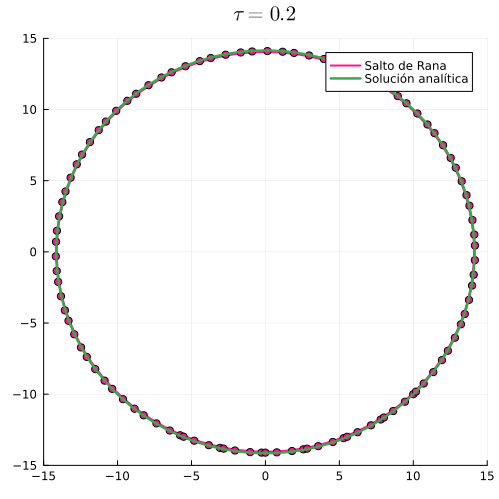

In [8]:
grad_K(p) = p
grad_V(q) = q

p_0 = 10.0
q_0 = -10.0

τ = 0.2

N = 100

G = salto_rana(p_0, q_0, τ, N, grad_K, grad_V);

plot(G, xlims=(-15, 15), ylims=(-15,15), linewidth=2, color = "deeppink1", label = "Salto de Rana")
    
scatter!(G, xlims=(-15, 15), ylims=(-15,15), label = "", color = "deeppink1")

#Gráfica análitica

T = range(0, 2*π, length=1000)

plot!( [sqrt(200)*cos(t) for t in T], [sqrt(200)*sin(t) for t in T], linewidth=2.5, label="Solución analítica")

title!("\$ \\tau = 0.2 \$")

plot!(size=(500,500))
    
#savefig("Salto_de_rana.png")

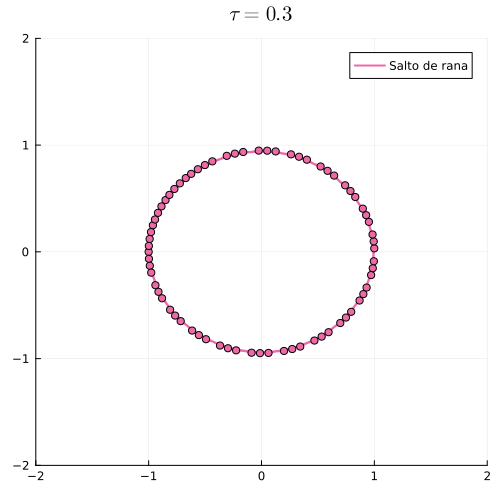

In [9]:
grad_K(p) = p
grad_V(q) = sin(q)

#Gráfica de la aproximación

p_0 = -1.0
q_0 = 0.0

τ = 0.3

N = 70

G = salto_rana(p_0, q_0, τ, N, grad_K, grad_V)

using Plots

plot(G, xlims=(-2, 2), ylims=(-2, 2), linewidth=2, color = "hotpink2", label = "Salto de rana")
    
scatter!(G, xlims=(-2, 2), ylims=(-2, 2), label = "", color = "hotpink2")

#Gráfica análitica

#T = range(0, 2*π, length=1000)

#plot!( [sqrt(200)*cos(t) for t in T], [sqrt(200)*sin(t) for t in T], linewidth=2, label="Solución analítica")

title!("\$ \\tau = 0.3 \$")

plot!(size=(500,500))